# Density

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import itertools
import matplotlib.animation as animation

import sys
sys.path.append("../src/")

import analysis
import eigenstates
import partition_energy
import chl_xtb
import read_files
import utils


In [2]:
run = "300ps_2fs"
LHII_data = read_files.all_LHII_data(run, 3000, True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 39.67it/s]
150000it [00:30, 4975.26it/s]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 50.01it/s]


<BarContainer object of 28 artists>

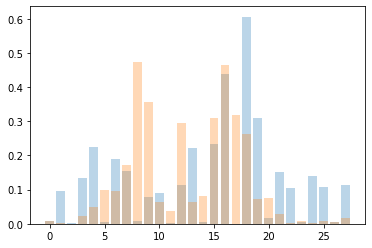

In [4]:
args, max_overlaps = eigenstates.follow_start_eigenstate(LHII_data["eigvec"], 1)

k=14

plt.bar(range(28), abs(LHII_data["eigvec"][0][:, 1]), alpha=0.3)
#plt.bar(range(28), abs(eigvec[max(k-1, 0)][:, int(args[max(k-1,0)])]), alpha=0.3)
plt.bar(range(28), abs(LHII_data["eigvec"][k][:, int(args[k])]), alpha=0.3)

#print(max_overlaps7[k])
#print(np.abs(np.dot(eigvec[k][:, args[k]], eigvec[max(k-1, 0)][:,args[max(k-1, 0)]])))

#plt.plot(max_overlaps)


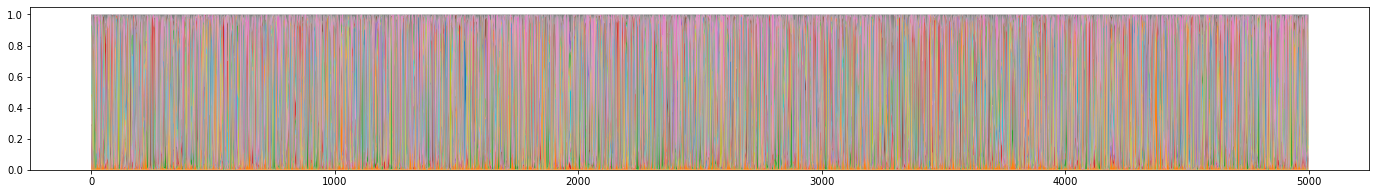

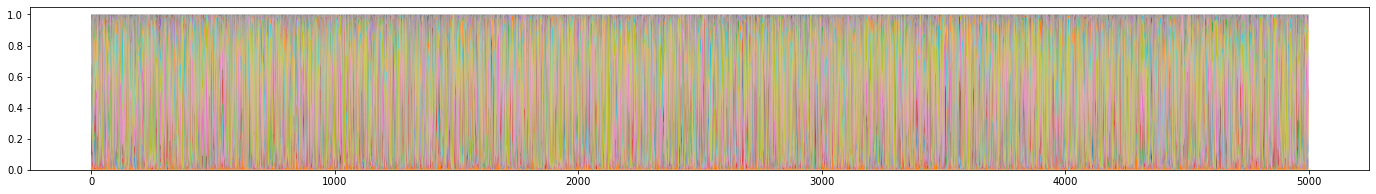

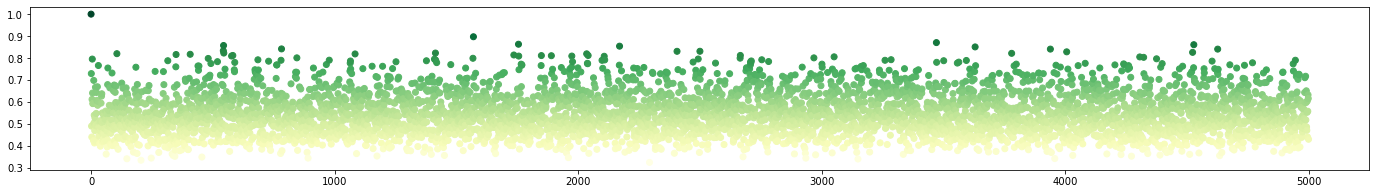

In [7]:
length = 5000

start = 12

fig, ax = plt.subplots(figsize=(24,3))

y = np.empty((28, length))

for f in range(length):
    y[:, f] = LHII_data["eigvec"][f][:, start]

check = (LHII_data["hamils"][0] @ y[:,0]) / y[:,0]

for i in range(28):
    assert(np.abs(np.mean(check) - check[i]) < 1e-6)
    
ax.stackplot(range(length), np.square(y));

fig, ax = plt.subplots(figsize=(24,3))

followed = np.empty((28, length))

for f in range(length):
    if f == 0:
        followed[:, f] = LHII_data["eigvec"][f][:, start]
        
    else:
        prev_eigvec = followed[:, 0]

        overlaps = [np.abs(np.dot(LHII_data["eigvec"][f][:, i], prev_eigvec)) for i in range(28)]

        arg = np.argmax(overlaps)
        max_overlap = overlaps[arg]
        
        followed[:, f] = LHII_data["eigvec"][f][:, arg]

check = (LHII_data["hamils"][0] @ y[:,0]) / y[:,0]

for i in range(28):
    assert(np.abs(np.mean(check) - check[i]) < 1e-6)

ax.stackplot(range(length), np.square(followed));

fig, ax = plt.subplots(figsize=(24, 3))

ax.scatter(range(length), max_overlaps[:length], c=max_overlaps[:length], cmap='YlGn')

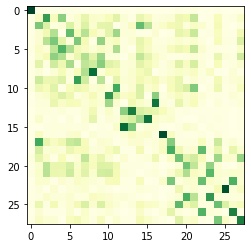

In [8]:
overlaps = np.empty((28, 28))

k=17

for i in range(28):
    for j in range(28):
        overlaps[i][j] = np.abs(np.dot(LHII_data["eigvec"][k][:, i], LHII_data["eigvec"][max(k-1, 0)][:, j]))

plt.imshow(overlaps, cmap='YlGn')

[-1.77635684e-15 -4.16333634e-15 -1.22124533e-15  4.17443857e-14
  6.66133815e-16]
8.743006318923108e-16
9.992007221626409e-16


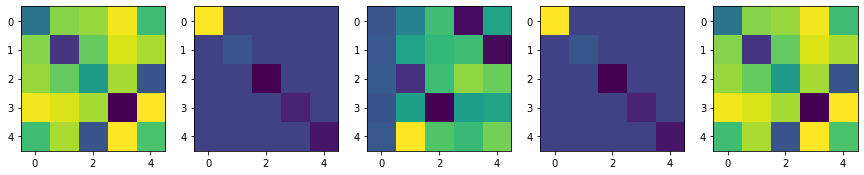

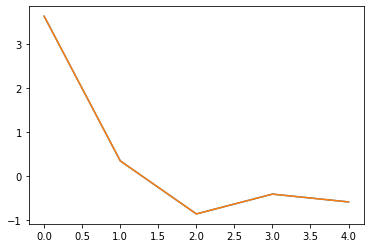

In [9]:
fig, ax = plt.subplots(1, 5)

H = np.random.uniform(size=(5, 5))
H = np.maximum(H, H.transpose() )
val, vec = np.linalg.eig(H)

val_mat = np.zeros((5, 5))
np.fill_diagonal(val_mat, val)

re_val = np.linalg.inv(vec) @ H @ vec
re_H = vec @ val_mat @ np.linalg.inv(vec)

ax[0].imshow(H)
ax[1].imshow(val_mat)
ax[2].imshow(vec)
ax[3].imshow(re_val)
ax[4].imshow(re_H)
fig.set_size_inches(15, 3)

print(((H @ vec) / vec).diagonal() - val)
print(np.max(re_val - val_mat))
print(np.max(re_H - H))

fig, ax = plt.subplots()
ax.plot(re_val.diagonal())
ax.plot(val)

ValueError: operands could not be broadcast together with shapes (5,5) (28,28) 

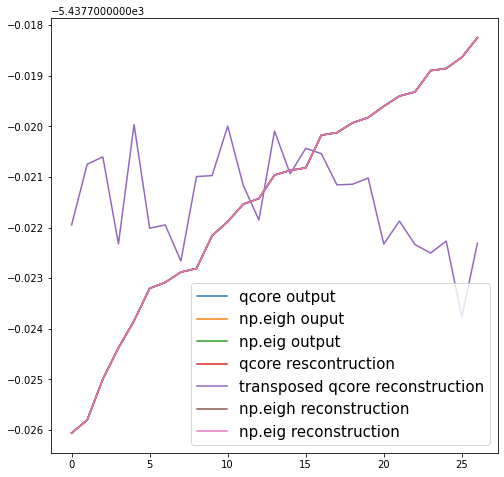

In [12]:
ham_0 = LHII_data["hamils"][0]
val_0 = LHII_data["eigval"][0]
vec_0 = LHII_data["eigvec"][0]

val_h, vec_h = np.linalg.eigh(ham_0)
val_d, vec_d = np.linalg.eig(ham_0)

fig, ax = plt.subplots(figsize=(8,8))
font = {'size'   : 15}
matplotlib.rc('font', **font)

ax.plot(val_0[1:], label="qcore output")
ax.plot(val_h[1:], label="np.eigh ouput")
ax.plot(np.sort(val_d)[1:], label="np.eig output")

ax.plot(utils.reconstruct_val(vec_0, ham_0)[1:], label = "qcore rescontruction")
ax.plot(utils.reconstruct_val(vec_0.T, ham_0)[1:], label = "transposed qcore reconstruction")

ax.plot(utils.reconstruct_val(vec_h, ham_0)[1:], label="np.eigh reconstruction")
ax.plot(np.sort(utils.reconstruct_val(vec_d, ham_0))[1:], label="np.eig reconstruction")

ax.legend(loc = 'lower right', ncol=1)

print("Max error in reconstructed Hamiltonian", np.max(re_H - LHII_data["hamils"][0]))
print("Max error in np reconstructed Hamiltonian", np.max(np_re_H - LHII_data["hamils"][0]))

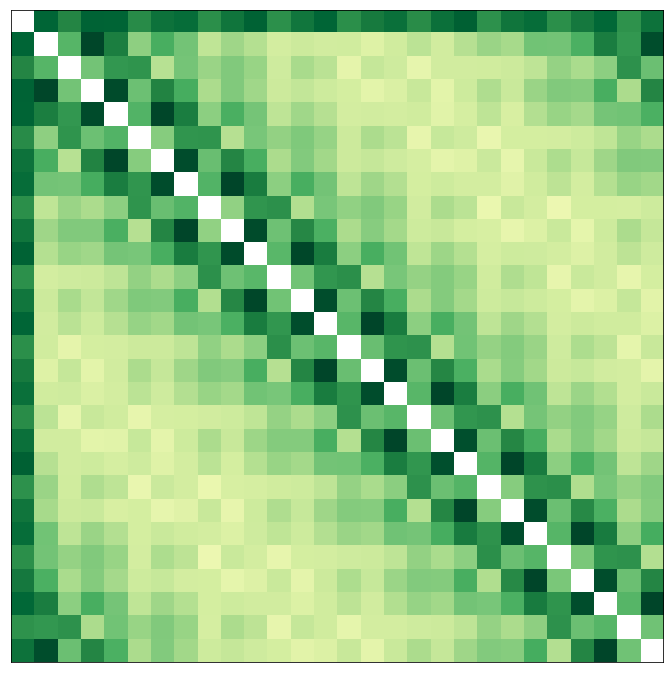

In [89]:
from matplotlib.colors import LogNorm

coupling = np.sum(np.abs(LHII_data["hamils"]), axis=0)

np.fill_diagonal(coupling, 0)

fig, ax = plt.subplots()

ax.matshow(coupling, cmap='YlGn', norm=LogNorm(vmin=0.1, vmax=250))

fig.set_size_inches(12,12)

ax.set_xticks([]);
ax.set_yticks([]);

plt.savefig("../images/coupling_matrix,png")

In [96]:
coupling[1, 3]

237.67932277827117

In [32]:
mg_xyz = read_files.load_mg_xyz()

Finished 'load_dcd_file' in 14.009050 secs


[ 1  4  7 10 13 16 19 22 25]
[16 10 13 22 19  4 25  7  1 18 12 20 14 15 26 17 21 24 23 11  9  3  0  6
  5  2  8]


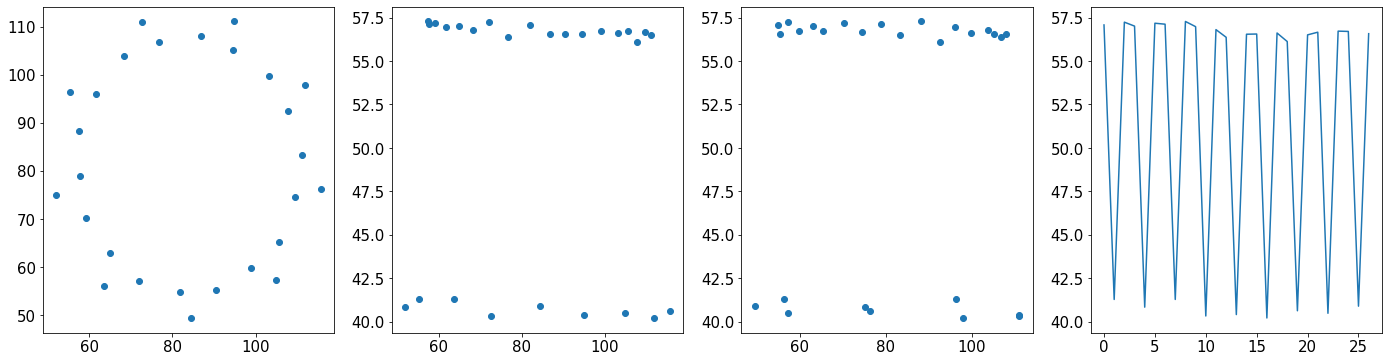

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

ax[0].scatter(mg_xyz[0][:,0], mg_xyz[0][:,1])
ax[1].scatter(mg_xyz[0][:,0], mg_xyz[0][:,2])
ax[2].scatter(mg_xyz[0][:,1], mg_xyz[0][:,2])

print(np.where(mg_xyz[0][:,2] < 47.5)[0])

print(np.argsort(mg_xyz[0][:,2]))

ax[3].plot(mg_xyz[0][:,2])

In [34]:
b800 = list(range(2, 28, 3))
b850a = list(range(1, 28, 3))
b850b = list(range(3, 28, 3))
rings = [0] + b800 + b850a + b850b

print(b800)

[2, 5, 8, 11, 14, 17, 20, 23, 26]


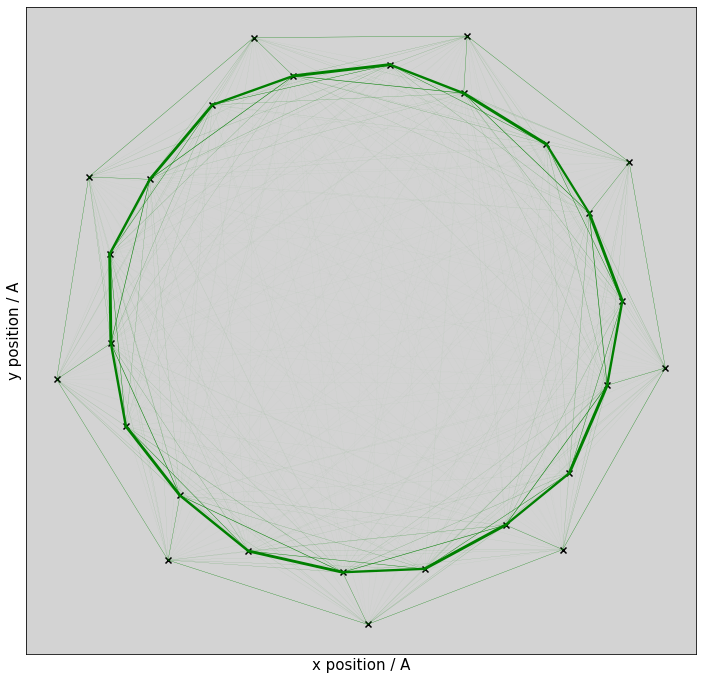

In [91]:
fig, ax = plt.subplots()

ax.scatter(mg_xyz[0][:,0], mg_xyz[0][:,1], marker='x', color='black')

for i in range(27):
    for j in range(i):
        x_i, x_j = mg_xyz[0][i,0], mg_xyz[0][j,0]
        y_i, y_j = mg_xyz[0][i,1], mg_xyz[0][j,1]
        
        ax.plot([x_i, x_j], [y_i, y_j], color='green', linewidth=3*coupling[i+1,j+1]/250)

ax.set_facecolor('lightgrey')
fig.set_size_inches(12,12)
ax.set_aspect('equal')

ax.set_xlabel("x position / A")
ax.set_ylabel("y position / A")

ax.set_xticks([]);
ax.set_yticks([]);

plt.savefig("../images/coupling_matrix,png")

. 

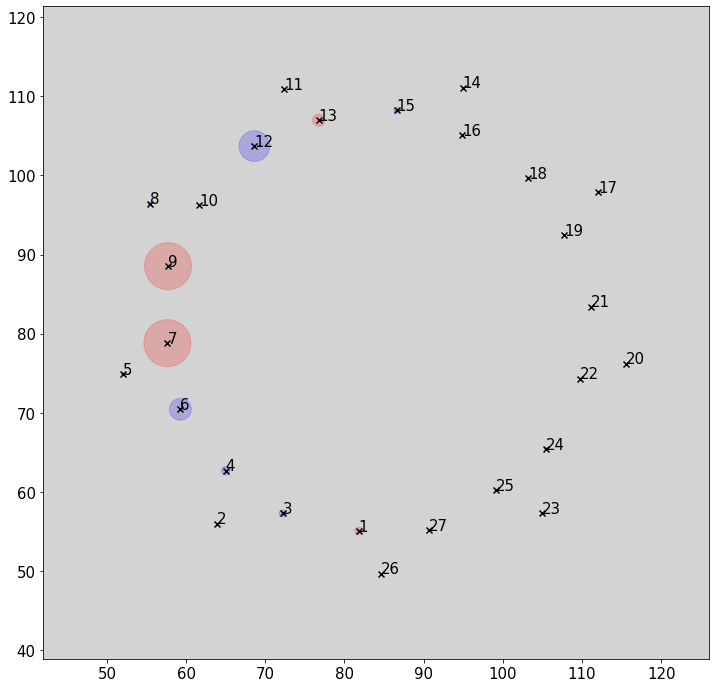

In [85]:
fig, ax = plt.subplots(figsize=(12,12))

frames = 200
fps=10
nSeconds = int(frames / fps)

max_x = np.max(mg_xyz[:, :, 0]) + 10
min_x = np.min(mg_xyz[:, :, 0]) - 10

max_y = np.max(mg_xyz[:, :, 1]) + 10
min_y = np.min(mg_xyz[:, :, 1]) - 10

def plot_coeff(i, state):
    ax.clear()
    
    ax.set_aspect('equal')
    ax.set_facecolor('lightgrey')
    ax.set_xlim((min_x, max_x))
    ax.set_ylim((min_y, max_y))
    
    if i % fps == 0 :
        print(".", end=" ")
    
    column = np.argmax(np.square(LHII_data['eigvec'][i][state]))

    #column = int(args[i])
    
    #for column in range(28): 
    coeff = LHII_data['eigvec'][i][:,column]    
    
    for e, c in enumerate(coeff[1:]):
        radius = 5 * abs(c)
        circle = matplotlib.patches.Circle((mg_xyz[i][e][0], mg_xyz[i][e][1]), radius=radius, alpha=0.2)

        ax.annotate(e+1, (mg_xyz[i][e][0], mg_xyz[i][e][1]))

        if c > 0:
            circle.set(color='red')
        if c < 0:
            circle.set(color='blue')

        ax.add_patch(circle)

    scat = ax.scatter(mg_xyz[i][:,0], mg_xyz[i][:,1], marker='x', color='black')
    
    return [scat]

plot_coeff(100,7)

#anim = animation.FuncAnimation(
#                               fig,
#                               plot_coeff, 
#                               frames = nSeconds * fps,
#                               interval = 1000 / fps, # in ms
#                               )

#anim.save('../movies/site_2.mp4', fps=fps, extra_args=['-vcodec', 'libx264'],dpi=170)

#print("done!")

In [93]:
density = np.square(LHII_data["eigvec"])
#diff = np.zeros(density.shape)

#for f in range(density.shape[0]):
#    for i,j in itertools.product(range(28), range(28)):
#        diff[f][i][j] = np.linalg.norm(density[f][:,i] - density[max(f-1, 0)][:,j])

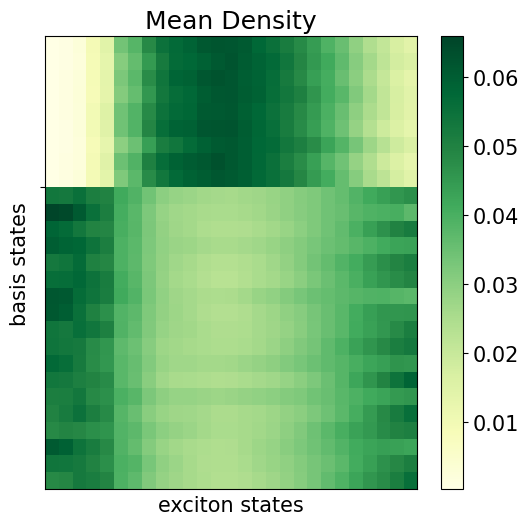

In [95]:
fig = plt.figure(figsize=(6,6), dpi=100)

plt.title("Mean Density")
plt.yticks([8.5], [""])
plt.xticks([])

plt.ylabel("basis states")
plt.xlabel("exciton states")

mean = np.mean(density, axis=0)
im = plt.imshow(mean[rings][1:, 1:], aspect='auto', cmap='YlGn')

#fig.colorbar(im, ticks=np.linspace(0, 1, 11));
fig.colorbar(im);

plt.savefig("../images/mean_density.png")

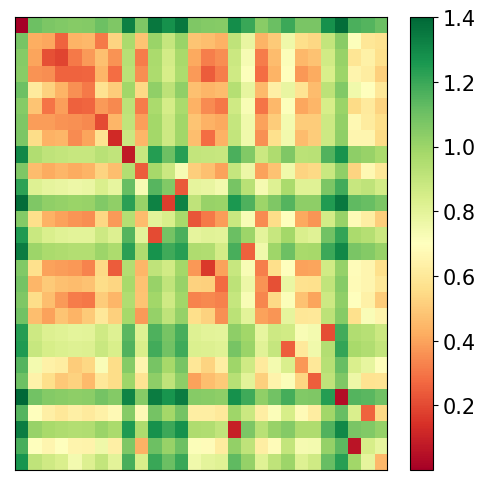

In [25]:
fig = plt.figure(figsize=(6,6), dpi=100)

plt.xticks([])
plt.yticks([])

im = plt.imshow(diff[3], aspect='auto', cmap='RdYlGn')

#fig.colorbar(im, ticks=np.linspace(0, 1, 11));
fig.colorbar(im);

.........................................................................................................................................................................................................Done!


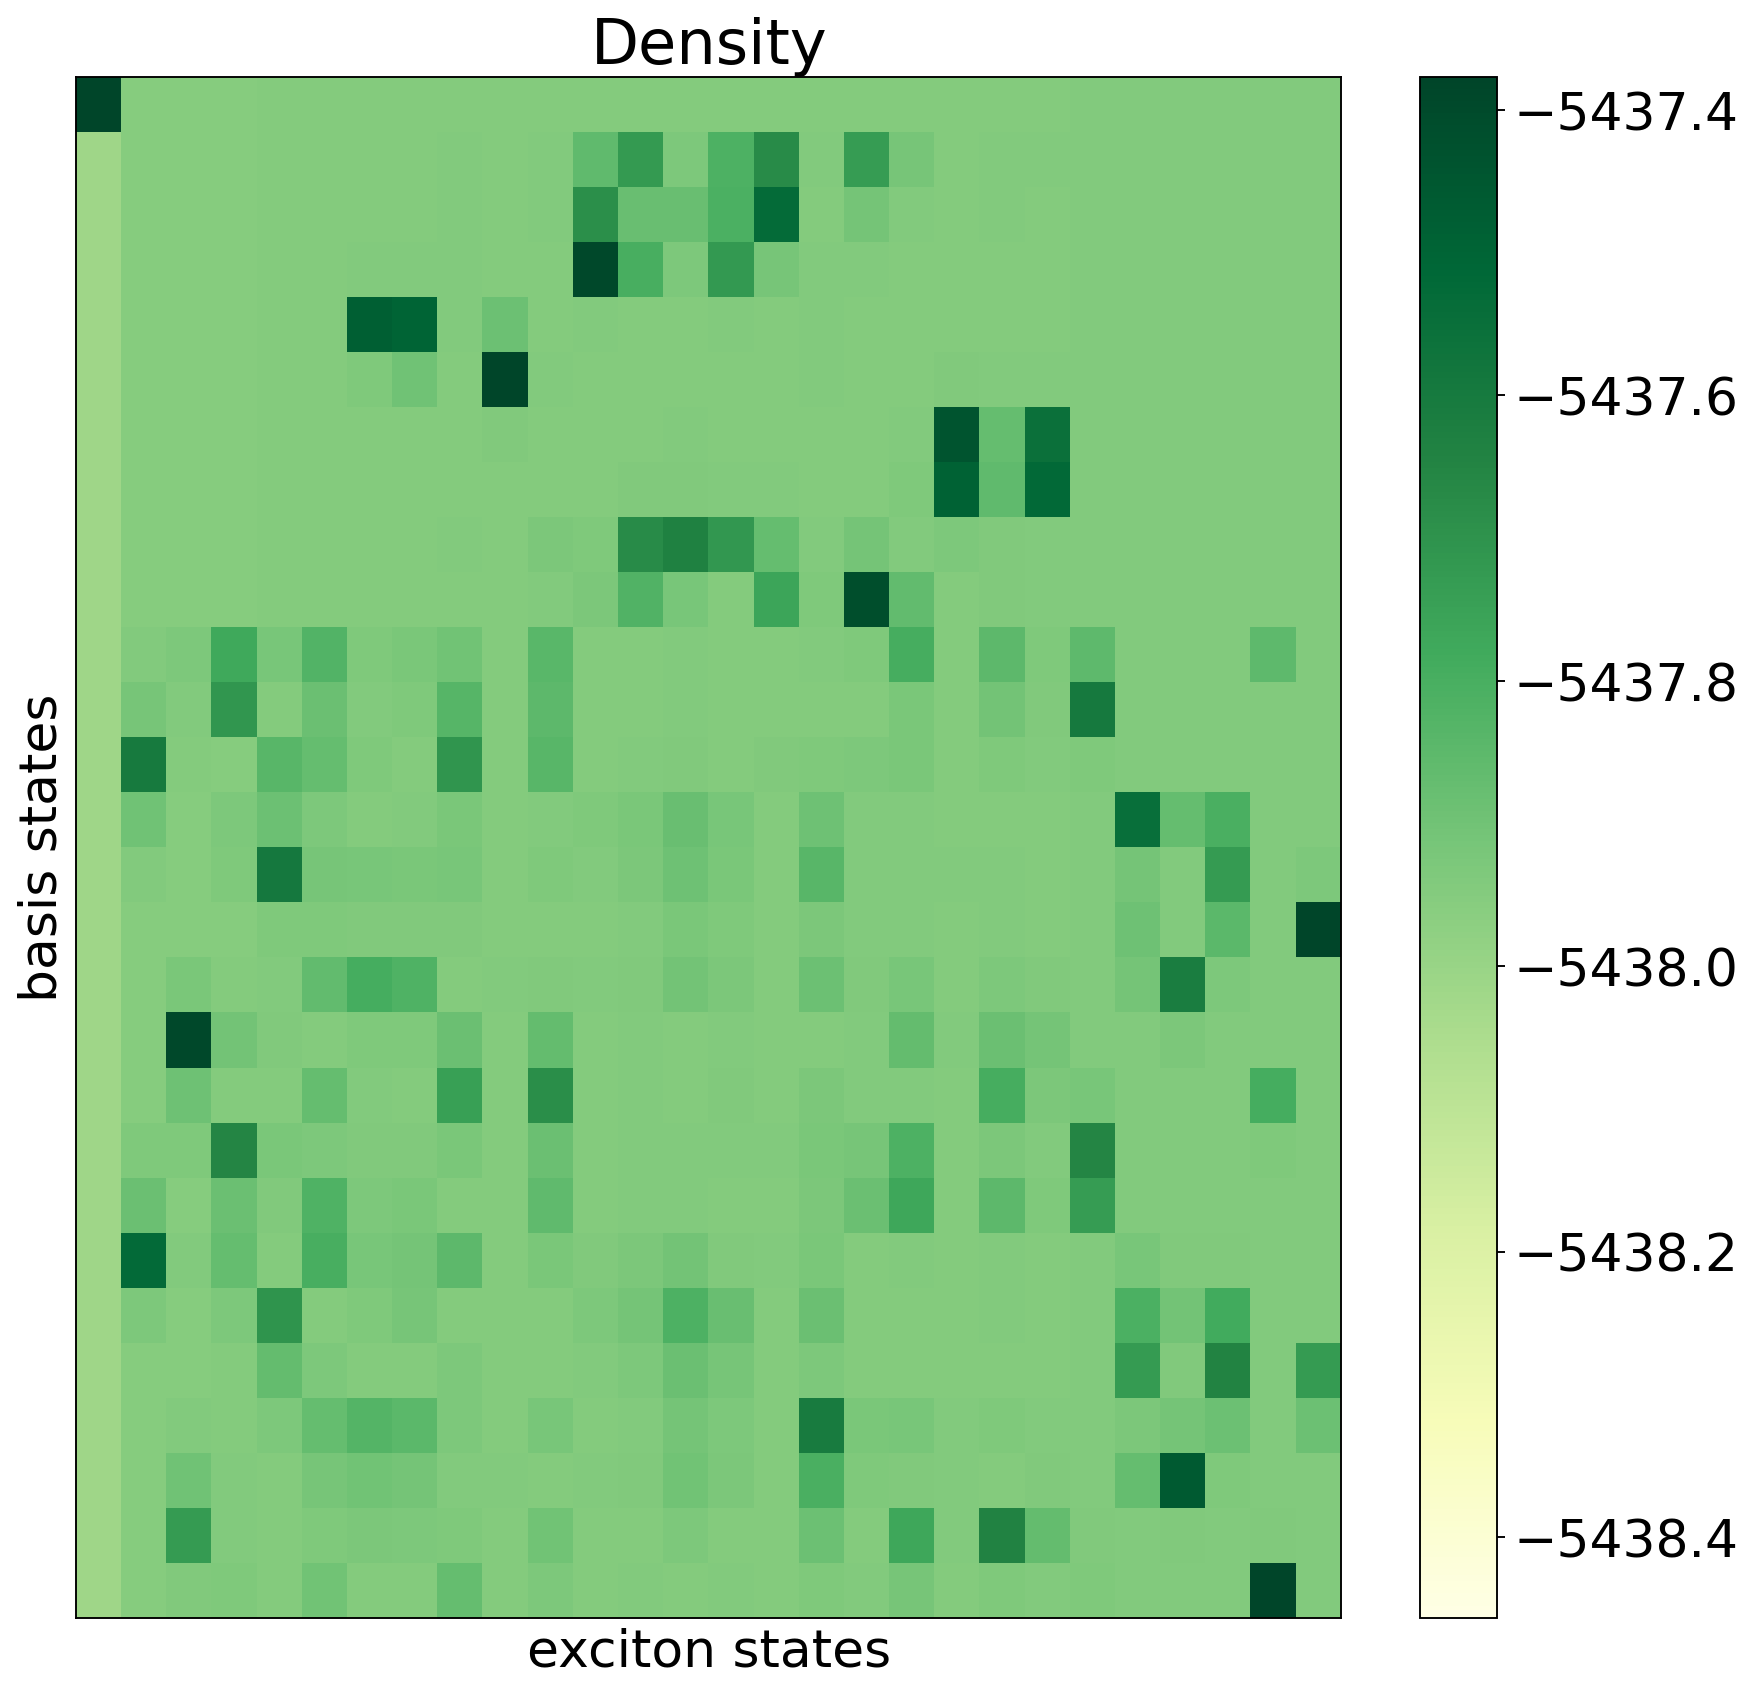

In [224]:
frames = 2000
fps = 10
nSeconds = int(frames / fps)

fig = plt.figure(figsize=(12,12), dpi=170)

plt.title("Density")
plt.xticks([])
plt.yticks([])

plt.ylabel("basis states")
plt.xlabel("exciton states")

vmax = np.max(eigval)
vmin = np.min(eigval)

energy_mat = np.tile(eigval[0].T, (28, 1))
a = density[0] + energy_mat
im = plt.imshow(a[rings], aspect='auto', cmap='YlGn', vmin=vmin, vmax=vmax)

fig.colorbar(im)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
        
    energy_mat = np.tile(eigval[i].T, (28, 1))
    
    plot_mat = density[i] + energy_mat
    
    im.set_array(plot_mat[rings])
    return [im]

anim = animation.FuncAnimation(
                               fig,
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('energy_breathing.mp4', fps=fps, extra_args=['-vcodec', 'libx264'],dpi=170)

print('Done!')

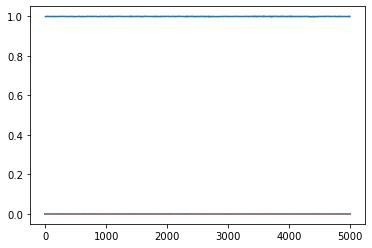

In [119]:
plt.plot(np.square(eigvec[:,:,0]));